In [17]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
Ls = 2 ** np.arange(4, 10, 1)
ps = np.array([i for i in range(26)] + [30, 40, 50]) / 100
D = 1
shots = 10000

In [19]:
# Load data. Rows are bip_mu, bip_std, trip_mu, trip_std; columns are p
data_list = [np.zeros((4, ps.shape[0])) for _ in Ls]
for i, L in enumerate(Ls):
    data = data_list[i]
    depth = int(L / 2)
    for j, p in enumerate(ps):
        try:
            filename = "data/{}_{}_{}_{}_{}_info.npy".format(L, depth, shots, p, D)
            data[:, j] = np.load(filename).flatten()
        except:
            print("No data for L = {}, p = {}".format(L, p))
            continue

No data for L = 16, p = 0.0
No data for L = 16, p = 0.01
No data for L = 16, p = 0.02
No data for L = 16, p = 0.03
No data for L = 16, p = 0.04
No data for L = 16, p = 0.05
No data for L = 16, p = 0.06
No data for L = 16, p = 0.07
No data for L = 16, p = 0.08
No data for L = 16, p = 0.09
No data for L = 16, p = 0.1
No data for L = 16, p = 0.11
No data for L = 16, p = 0.12
No data for L = 16, p = 0.13
No data for L = 16, p = 0.14
No data for L = 16, p = 0.15
No data for L = 16, p = 0.16
No data for L = 16, p = 0.17
No data for L = 16, p = 0.18
No data for L = 16, p = 0.19
No data for L = 16, p = 0.2
No data for L = 16, p = 0.21
No data for L = 16, p = 0.22
No data for L = 16, p = 0.23
No data for L = 16, p = 0.24
No data for L = 16, p = 0.25
No data for L = 16, p = 0.3
No data for L = 16, p = 0.4
No data for L = 16, p = 0.5
No data for L = 32, p = 0.0
No data for L = 32, p = 0.01
No data for L = 32, p = 0.02
No data for L = 32, p = 0.03
No data for L = 32, p = 0.04
No data for L = 32, p

In [20]:
stub = "figs/{}_{}_{}_{}_".format(L, depth, shots, D)
colors = sns.color_palette("tab10")

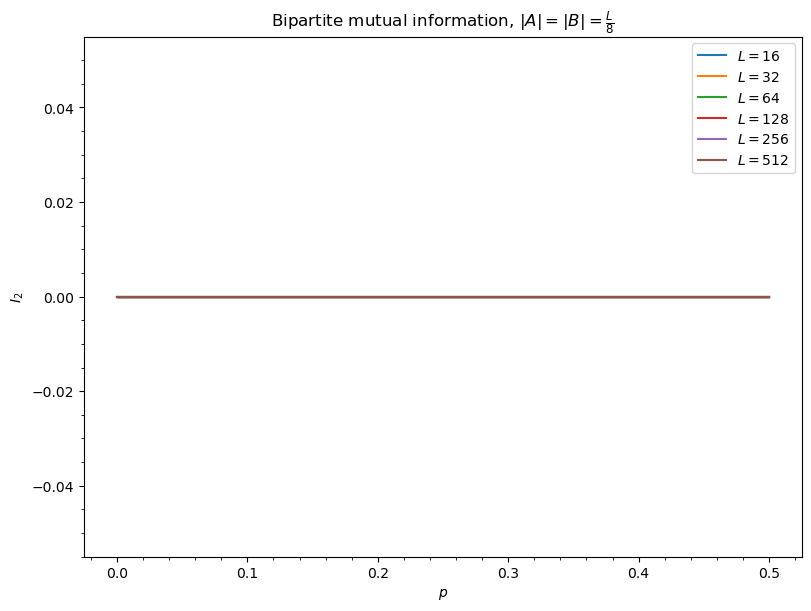

In [21]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    data = data_list[i]
    mu = data[0, :]
    std = data[1, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$I_2$")
plt.title(r"Bipartite mutual information, $\left|A\right|=\left|B\right|=\frac{L}{8}$")
plt.legend(loc = "upper right")
plt.minorticks_on()
# plt.savefig(stub + "bip.png")

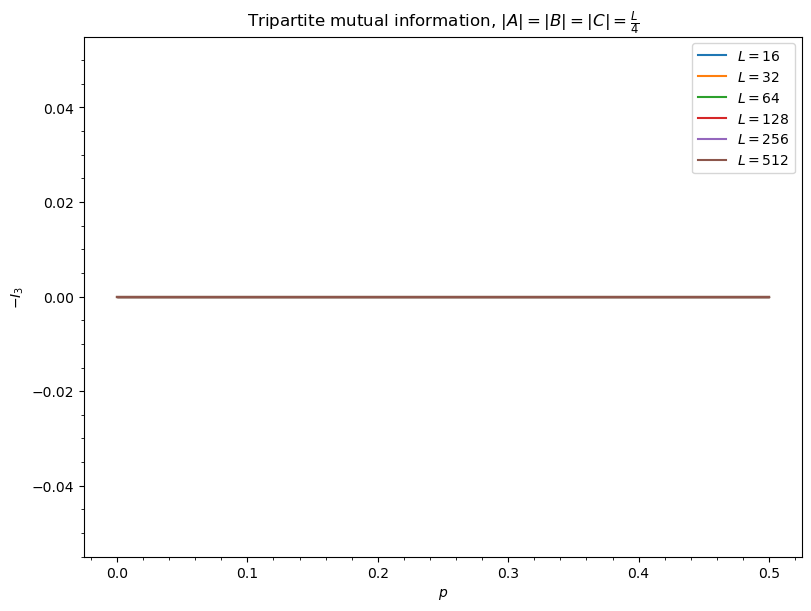

In [22]:
plt.subplots(figsize = (8, 6), layout = "constrained")

for i, L in enumerate(Ls):
    data = data_list[i]
    mu = data[2, :]
    std = data[3, :]
    plt.plot(ps, mu, label = "$L={}$".format(L), color = colors[i])
    plt.fill_between(ps, mu - std, mu + std, color = colors[i], alpha = 0.3)

plt.xlabel(r"$p$")
plt.ylabel(r"$-I_3$")
plt.title(r"Tripartite mutual information, $\left|A\right|=\left|B\right|=\left|C\right|=\frac{L}{4}$")
plt.legend(loc = "upper right")
plt.minorticks_on()
# plt.savefig(stub + "trip.png")